In [1]:
#Importation des modules de Python 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ouverture des fichiers 


In [2]:
#Ouverture de notre jeux de données principale
usa =  pd.read_csv('usa2.csv', sep=',', encoding='ISO-8859-1')

#Suppresion de la 1er colonne suivante dérengeante
usa = usa.drop(['Unnamed: 0'],axis=1)

usa.head(10)

,cbssa,name,state,NameState,PartUSA,Political,Candidat,BorderSea,Anglais_Off,POP10,...,MORE65p,NODIPLOMp,F9TO12THp,UNDERGRADp,GRADUATEp,F0TO20p,F20TO40p,F40TO60p,F60TO80p,F80TO100p
0,10100,Aberdeen,SD,South Dakota,North-West,Republicain,Trump,No,Yes,40602,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Aberdeen,WA,Washington,North-East,Republicain,Trump,Yes,No,72797,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Abilene,TX,Texas,South-West,Republicain,Trump,No,No,165252,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Ada,OK,Oklahoma,South-West,Republicain,Trump,No,No,37492,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Adrian,MI,Michigan,North-East,Republicain,Trump,No,No,99892,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17
5,10420,Akron,OH,Ohio,North-East,Democrate,Clinton,No,No,703200,...,14.19,2.40,41.01,28.23,28.35,19.44,20.94,18.41,22.62,18.58
6,10460,Alamogordo,NM,New Mexico,South-West,Republicain,Trump,No,No,63797,...,14.97,7.64,36.30,38.59,17.47,24.72,26.37,19.51,19.12,10.28
7,10500,Albany,GA,Georgia,South-East,Democrate,Clinton,No,Yes,157308,...,11.99,6.32,46.68,30.91,16.09,29.28,24.08,16.34,18.18,12.11
8,10540,Albany,OR,Oregon,North-West,Republicain,Trump,No,No,116672,...,15.42,3.31,40.64,39.90,16.15,19.64,22.61,21.00,24.04,12.70
9,10580,Albany-Schenectady-Troy,NY,New-York,North-East,Republicain,Trump,No,No,870716,...,14.04,2.74,34.33,29.35,33.57,14.89,17.97,16.49,24.91,25.74


In [3]:
usa.columns

Index(['cbssa', 'name', 'state', 'NameState', 'PartUSA', 'Political',
       'Candidat', 'BorderSea', 'Anglais_Off', 'POP10', 'WHITEp', 'BLACKp',
       'ASIANp', 'OTHERp', 'HISPAp', 'UNDER18p', 'F18TO24p', 'F25TO44p',
       'F45TO64p', 'MORE65p', 'NODIPLOMp', 'F9TO12THp', 'UNDERGRADp',
       'GRADUATEp', 'F0TO20p', 'F20TO40p', 'F40TO60p', 'F60TO80p',
       'F80TO100p'],
      dtype='object')

In [4]:
#Séparation des données en 5 régions

#Nord-Ouest
n_w = usa[usa['PartUSA'] == 'North-West']

#Nord-Est
n_e = usa[usa['PartUSA'] == 'North-East']

#Sud-Est
s_e = usa[usa['PartUSA'] == 'South-East']

#Sud-Ouest
s_w = usa[usa['PartUSA'] == 'South-West']

#Autres
other = usa[usa['PartUSA'] == 'OTHER']


# 1- Analyse générale

Analyse général de nos 5 régions des USA

### 1-1 Calcul du nombre d'habitants


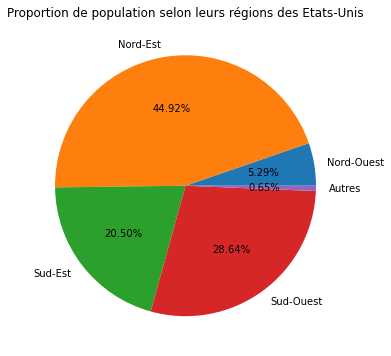

In [5]:

hab_reg = [sum(n_w.POP10),sum(n_e.POP10),sum(s_e.POP10),sum(s_w.POP10),sum(other.POP10)]
hab_reg


plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(hab_reg,labels = ["Nord-Ouest","Nord-Est","Sud-Est","Sud-Ouest","Autres"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs régions des Etats-Unis')
plt.savefig("pop_region.png")

plt.show()

In [6]:
hab_reg = pd.DataFrame(hab_reg)

hab_reg.rename(columns = {0:"Nombre d\'habitants"},
              index = {0 : 'Nord-Ouest',
                      1 : 'Nord-Est',
                      2 : 'Sud-Est',
                      3 : 'Sud-Ouest',
                      4 : 'Autre'})

,Nombre d'habitants
Nord-Ouest,15242209
Nord-Est,129518808
Sud-Est,59094400
Sud-Ouest,82587114
Autre,1883455


### 1-2 Nombre de communes/état

#### Nombre de commune par région

In [7]:
nb_com_reg = pd.DataFrame(usa.value_counts(usa.PartUSA))

nb_com_reg = nb_com_reg.rename(columns = {0:"Nombre de commune"})

nb_com_reg

,Nombre de commune
PartUSA,
North-East,372
South-East,224
South-West,210
North-West,103
OTHER,8


# 2 - Analyse de la population selon les catégories par région 

### 2-1 Nord-Ouest

In [8]:
#Population ethnique

#On calcule les proportions des communautés



#on va créer un fonction pour faire des proportions
pop_nw = list(n_w.POP10)

#population blanche
prop_blanche = list(n_w.WHITEp/100)
pop_blanche = list()
for i in range(103):
    pop_blanche.append(round(pop_nw[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(n_w.BLACKp/100)
pop_noir = list()
for i in range(103):
    pop_noir.append(round(pop_nw[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(n_w.HISPAp/100)
pop_hispa = list()
for i in range(103):
    pop_hispa.append(round(pop_nw[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(n_w.ASIANp/100)
pop_asia = list()
for i in range(103):
    pop_asia.append(round(pop_nw[i]*prop_asia[i]))

# population autres
prop_other = list(n_w.OTHERp/100)
pop_other = list()
for i in range(103):
    pop_other.append(round(pop_nw[i]*prop_other[i]))

    
    
nw_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
nw_etno  

[12244836, 544785, 1357963, 506186, 587953]

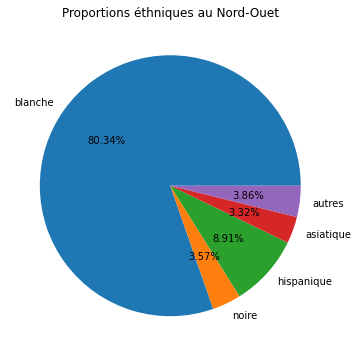

In [9]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(nw_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportions éthniques au Nord-Ouet')
plt.savefig("NW_etnique.png")

plt.show()

In [10]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_nw = list(n_w.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(n_w.UNDER18p/100)
pop_m18 = list()
for i in range(103):
    pop_m18.append(round(pop_nw[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(n_w.F18TO24p/100)
pop_d18a25 = list()
for i in range(103):
    pop_d18a25.append(round(pop_nw[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(n_w.F25TO44p/100)
pop_d25a44 = list()
for i in range(103):
    pop_d25a44.append(round(pop_nw[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(n_w.F45TO64p/100)
pop_de45a64 = list()
for i in range(103):
    pop_de45a64.append(round(pop_nw[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(n_w.MORE65p/100)
pop_p65 = list()
for i in range(103):
    pop_p65.append(round(pop_nw[i]*prop_p65[i]))

    
    
nw_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
nw_age

[3748798, 1532473, 4084287, 3988200, 1888064]

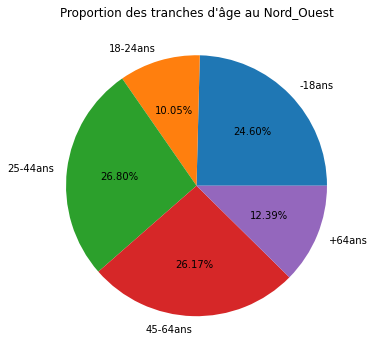

In [11]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(nw_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportion des tranches d\'âge au Nord_Ouest')
plt.savefig("NW_age.png")

plt.show()

In [12]:
#On calcule les proportions selon leurs parcours scolaires

#on va créer un fonction pour faire des proportions
pop_nw = list(n_w.POP10)

#population non diplômé
prop_nodiplome = list(n_w.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(103):
    pop_nodiplome.append(round(pop_nw[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(n_w.F9TO12THp/100)
pop_lycee = list()
for i in range(103):
    pop_lycee.append(round(pop_nw[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(n_w.UNDERGRADp/100)
pop_bac = list()
for i in range(103):
    pop_bac.append(round(pop_nw[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(n_w.GRADUATEp/100)
pop_univ = list()
for i in range(103):
    pop_univ.append(round(pop_nw[i]*prop_univ[i]))

    
nw_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
nw_scolaire

[570943, 4933215, 5139385, 4598575]

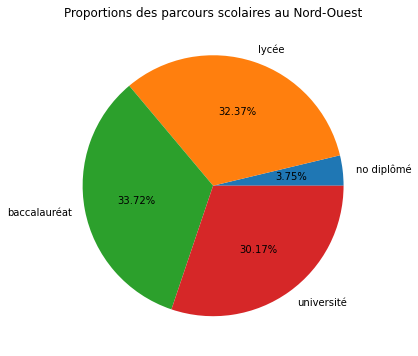

In [13]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(nw_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportions des parcours scolaires au Nord-Ouest')
plt.savefig("NW_scolaire.png")

plt.show()

In [14]:
#On calcule les proportions selon leurs revenus

#on va créer un fonction pour faire des proportions
pop_nw = list(n_w.POP10)



#population ayant un revenu de moins de 20000$
prop_m20d = list(n_w.F0TO20p/100)
pop_m20d = list()
for i in range(103):
    pop_m20d.append(round(pop_nw[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(n_w.F20TO40p/100)
pop_m2040d = list()
for i in range(103):
    pop_m2040d.append(round(pop_nw[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(n_w.F40TO60p/100)
pop_m4060d = list()
for i in range(103):
    pop_m4060d.append(round(pop_nw[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(n_w.F60TO80p/100)
pop_m6080d = list()
for i in range(103):
    pop_m6080d.append(round(pop_nw[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(n_w.F80TO100p/100)
pop_p80d = list()
for i in range(103):
    pop_p80d.append(round(pop_nw[i]*prop_p80d[i])) 
    
    
nw_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
nw_revenu

[2458211, 3087334, 2710207, 3718377, 3268416]

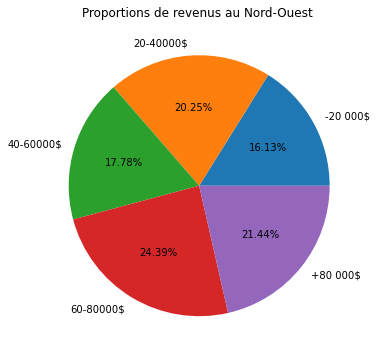

In [15]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(nw_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportions de revenus au Nord-Ouest ')
plt.savefig("NW_revenu.png")

plt.show()

### 2-2 Nord-Est

In [16]:
#Population ethnique

#On calcule les proportions des communautés



#on va créer un fonction pour faire des proportions
pop_ne = list(n_e.POP10)

#population blanche
prop_blanche = list(n_e.WHITEp/100)
pop_blanche = list()
for i in range(372):
    pop_blanche.append(round(pop_ne[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(n_e.BLACKp/100)
pop_noir = list()
for i in range(372):
    pop_noir.append(round(pop_ne[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(n_e.HISPAp/100)
pop_hispa = list()
for i in range(372):
    pop_hispa.append(round(pop_ne[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(n_e.ASIANp/100)
pop_asia = list()
for i in range(372):
    pop_asia.append(round(pop_ne[i]*prop_asia[i]))

# population autres
prop_other = list(n_e.OTHERp/100)
pop_other = list()
for i in range(372):
    pop_other.append(round(pop_ne[i]*prop_other[i]))

    
    
ne_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
ne_etno  

[91674378, 16298446, 12730620, 5675365, 3139837]

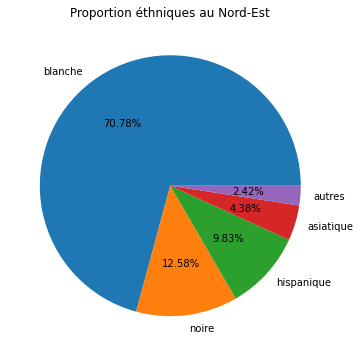

In [17]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(ne_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportion éthniques au Nord-Est')
plt.savefig("NE_etnique.png")

plt.show()

In [18]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_ne = list(n_e.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(n_e.UNDER18p/100)
pop_m18 = list()
for i in range(372):
    pop_m18.append(round(pop_ne[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(n_e.F18TO24p/100)
pop_d18a25 = list()
for i in range(372):
    pop_d18a25.append(round(pop_ne[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(n_e.F25TO44p/100)
pop_d25a44 = list()
for i in range(372):
    pop_d25a44.append(round(pop_ne[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(n_e.F45TO64p/100)
pop_de45a64 = list()
for i in range(372):
    pop_de45a64.append(round(pop_ne[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(n_e.MORE65p/100)
pop_p65 = list()
for i in range(372):
    pop_p65.append(round(pop_ne[i]*prop_p65[i]))

    
    
ne_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
ne_age

[30052266, 12839768, 34125362, 35244472, 17258063]

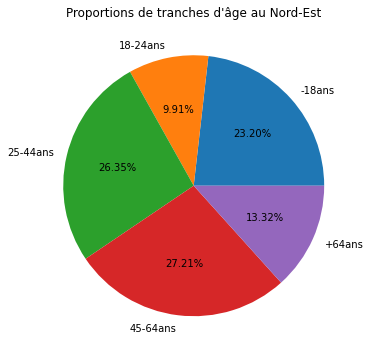

In [19]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(ne_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportions de tranches d\'âge au Nord-Est')
plt.savefig("NE_age.png")

plt.show()

In [20]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_ne = list(n_e.POP10)

#population non diplômé
prop_nodiplome = list(n_e.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(372):
    pop_nodiplome.append(round(pop_ne[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(n_e.F9TO12THp/100)
pop_lycee = list()
for i in range(372):
    pop_lycee.append(round(pop_ne[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(n_e.UNDERGRADp/100)
pop_bac = list()
for i in range(372):
    pop_bac.append(round(pop_ne[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(n_e.GRADUATEp/100)
pop_univ = list()
for i in range(372):
    pop_univ.append(round(pop_ne[i]*prop_univ[i]))

    
ne_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
ne_scolaire

[6095691, 47778883, 35472955, 40172543]

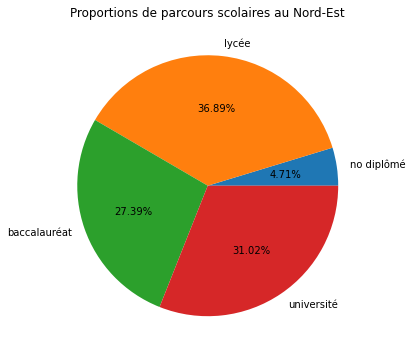

In [21]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(ne_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportions de parcours scolaires au Nord-Est')
plt.savefig("NE_scolaire.png")

plt.show()

In [22]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_ne = list(n_e.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(n_e.F0TO20p/100)
pop_m20d = list()
for i in range(372):
    pop_m20d.append(round(pop_ne[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(n_e.F20TO40p/100)
pop_m2040d = list()
for i in range(372):
    pop_m2040d.append(round(pop_ne[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(n_e.F40TO60p/100)
pop_m4060d = list()
for i in range(372):
    pop_m4060d.append(round(pop_ne[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(n_e.F60TO80p/100)
pop_m6080d = list()
for i in range(372):
    pop_m6080d.append(round(pop_ne[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(n_e.F80TO100p/100)
pop_p80d = list()
for i in range(372):
    pop_p80d.append(round(pop_ne[i]*prop_p80d[i])) 
    
    
ne_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
ne_revenu

[21794928, 24670851, 21329675, 29556135, 32164492]

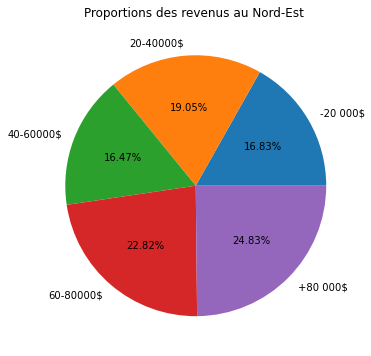

In [23]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(ne_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportions des revenus au Nord-Est ')
plt.savefig("NE_revenu.png")

plt.show()

### 2-3 Sud-Est

In [24]:
#Population ethnique

#On calcule les proportions des communautés



#on va créer un fonction pour faire des proportions
pop_se = list(s_e.POP10)

#population blanche
prop_blanche = list(s_e.WHITEp/100)
pop_blanche = list()
for i in range(224):
    pop_blanche.append(round(pop_se[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(s_e.BLACKp/100)
pop_noir = list()
for i in range(224):
    pop_noir.append(round(pop_se[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(s_e.HISPAp/100)
pop_hispa = list()
for i in range(224):
    pop_hispa.append(round(pop_se[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(s_e.ASIANp/100)
pop_asia = list()
for i in range(224):
    pop_asia.append(round(pop_se[i]*prop_asia[i]))

# population autres
prop_other = list(s_e.OTHERp/100)
pop_other = list()
for i in range(224):
    pop_other.append(round(pop_se[i]*prop_other[i]))

    
    
se_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
se_etno  

[36637657, 13073441, 6827097, 1272093, 1284004]

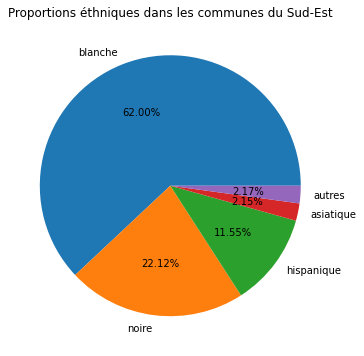

In [25]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(se_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportions éthniques dans les communes du Sud-Est')
plt.savefig("SE_etnique.png")

plt.show()

In [26]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_se = list(s_e.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(s_e.UNDER18p/100)
pop_m18 = list()
for i in range(224):
    pop_m18.append(round(pop_se[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(s_e.F18TO24p/100)
pop_d18a25 = list()
for i in range(224):
    pop_d18a25.append(round(pop_se[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(s_e.F25TO44p/100)
pop_d25a44 = list()
for i in range(224):
    pop_d25a44.append(round(pop_se[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(s_e.F45TO64p/100)
pop_de45a64 = list()
for i in range(224):
    pop_de45a64.append(round(pop_se[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(s_e.MORE65p/100)
pop_p65 = list()
for i in range(224):
    pop_p65.append(round(pop_se[i]*prop_p65[i]))

    
    
se_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
se_age

[13879767, 5841575, 15593114, 15570525, 8209191]

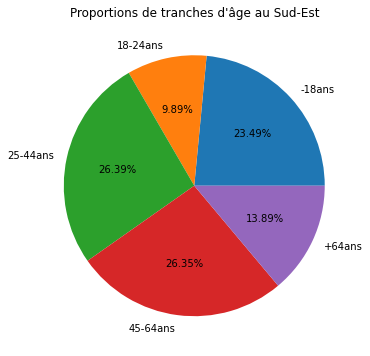

In [27]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(se_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportions de tranches d\'âge au Sud-Est')
plt.savefig("SE_age.png")

plt.show()

In [28]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_se = list(s_e.POP10)

#population non diplômé
prop_nodiplome = list(s_e.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(224):
    pop_nodiplome.append(round(pop_se[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(s_e.F9TO12THp/100)
pop_lycee = list()
for i in range(224):
    pop_lycee.append(round(pop_se[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(s_e.UNDERGRADp/100)
pop_bac = list()
for i in range(224):
    pop_bac.append(round(pop_se[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(s_e.GRADUATEp/100)
pop_univ = list()
for i in range(224):
    pop_univ.append(round(pop_se[i]*prop_univ[i]))

    
se_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
se_scolaire

[3349742, 23053585, 17291703, 15399569]

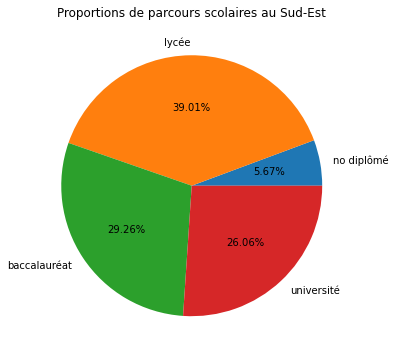

In [29]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(se_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportions de parcours scolaires au Sud-Est')
plt.savefig("SE_scolaire.png")

plt.show()

In [30]:
#On calcule les proportions desrevenus tranches d'âges

#on va créer un fonction pour faire des proportions
pop_se = list(s_e.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(s_e.F0TO20p/100)
pop_m20d = list()
for i in range(224):
    pop_m20d.append(round(pop_se[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(s_e.F20TO40p/100)
pop_m2040d = list()
for i in range(224):
    pop_m2040d.append(round(pop_se[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(s_e.F40TO60p/100)
pop_m4060d = list()
for i in range(224):
    pop_m4060d.append(round(pop_se[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(n_e.F60TO80p/100)
pop_m6080d = list()
for i in range(224):
    pop_m6080d.append(round(pop_se[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(n_e.F80TO100p/100)
pop_p80d = list()
for i in range(224):
    pop_p80d.append(round(pop_se[i]*prop_p80d[i])) 
    
    
se_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
se_revenu

[12115244, 13420190, 10513842, 13302689, 9491768]

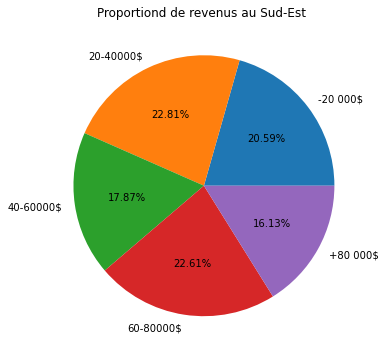

In [31]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(se_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportiond de revenus au Sud-Est ')
plt.savefig("SE_revenu.png")

plt.show()

### 2-4 Sud-Ouest

In [32]:
#Population ethnique

#On calcule les proportions des communautés

#on va créer un fonction pour faire des proportions
pop_sw = list(s_w.POP10)

#population blanche
prop_blanche = list(s_w.WHITEp/100)
pop_blanche = list()
for i in range(210):
    pop_blanche.append(round(pop_sw[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(s_w.BLACKp/100)
pop_noir = list()
for i in range(210):
    pop_noir.append(round(pop_sw[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(s_w.HISPAp/100)
pop_hispa = list()
for i in range(210):
    pop_hispa.append(round(pop_sw[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(s_w.ASIANp/100)
pop_asia = list()
for i in range(210):
    pop_asia.append(round(pop_sw[i]*prop_asia[i]))

# population autres
prop_other = list(s_w.OTHERp/100)
pop_other = list()
for i in range(210):
    pop_other.append(round(pop_sw[i]*prop_other[i]))

    
    
sw_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
sw_etno  

[38993062, 6045706, 28155538, 6362535, 3029250]

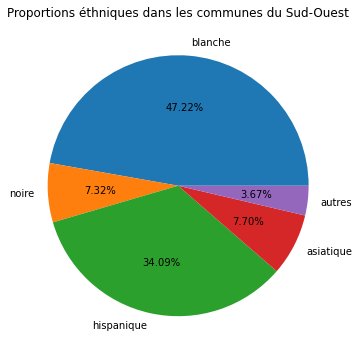

In [33]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(sw_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportions éthniques dans les communes du Sud-Ouest')
plt.savefig("SW_etnique.png")

plt.show()

In [34]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_sw = list(s_w.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(s_w.UNDER18p/100)
pop_m18 = list()
for i in range(210):
    pop_m18.append(round(pop_sw[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(s_w.F18TO24p/100)
pop_d18a25 = list()
for i in range(210):
    pop_d18a25.append(round(pop_sw[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(s_w.F25TO44p/100)
pop_d25a44 = list()
for i in range(210):
    pop_d25a44.append(round(pop_sw[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(s_e.F45TO64p/100)
pop_de45a64 = list()
for i in range(210):
    pop_de45a64.append(round(pop_sw[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(s_e.MORE65p/100)
pop_p65 = list()
for i in range(210):
    pop_p65.append(round(pop_sw[i]*prop_p65[i]))

    
    
sw_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
sw_age

[21249301, 8563841, 23086624, 21464945, 11907025]

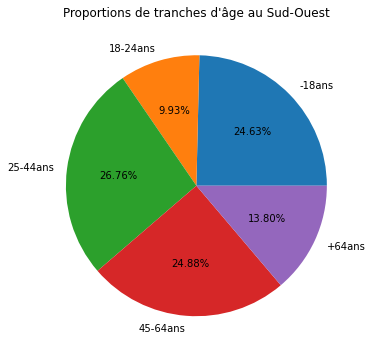

In [35]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(sw_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportions de tranches d\'âge au Sud-Ouest')
plt.savefig("SW_age.png")

plt.show()

In [36]:
#On calcule les proportions des parcours scolaires

#on va créer un fonction pour faire des proportions
pop_sw = list(s_w.POP10)

#population non diplômé
prop_nodiplome = list(s_w.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(210):
    pop_nodiplome.append(round(pop_sw[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(s_w.F9TO12THp/100)
pop_lycee = list()
for i in range(210):
    pop_lycee.append(round(pop_sw[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(s_w.UNDERGRADp/100)
pop_bac = list()
for i in range(210):
    pop_bac.append(round(pop_sw[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(s_w.GRADUATEp/100)
pop_univ = list()
for i in range(210):
    pop_univ.append(round(pop_sw[i]*prop_univ[i]))

    
sw_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
sw_scolaire

[7379848, 26310355, 25127120, 23770041]

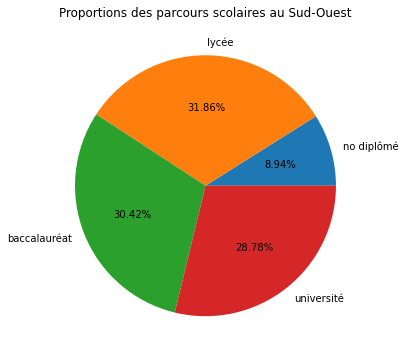

In [37]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(sw_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportions des parcours scolaires au Sud-Ouest')
plt.savefig("SW_scolaire.png")

plt.show()

In [38]:
#On calcule les proportions des revenus

#on va créer un fonction pour faire des proportions
pop_sw = list(s_w.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(s_w.F0TO20p/100)
pop_m20d = list()
for i in range(210):
    pop_m20d.append(round(pop_sw[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(s_w.F20TO40p/100)
pop_m2040d = list()
for i in range(210):
    pop_m2040d.append(round(pop_sw[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(s_w.F40TO60p/100)
pop_m4060d = list()
for i in range(210):
    pop_m4060d.append(round(pop_sw[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(s_w.F60TO80p/100)
pop_m6080d = list()
for i in range(210):
    pop_m6080d.append(round(pop_sw[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(s_w.F80TO100p/100)
pop_p80d = list()
for i in range(210):
    pop_p80d.append(round(pop_sw[i]*prop_p80d[i])) 
    
    
sw_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
sw_revenu

[13827915, 16417329, 13755796, 18348939, 20238863]

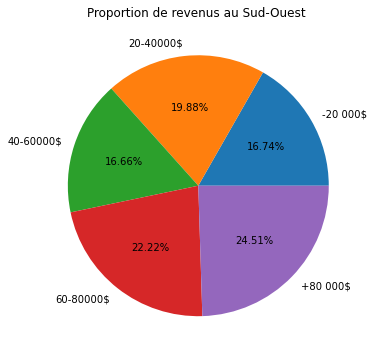

In [39]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(sw_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportion de revenus au Sud-Ouest ')
plt.savefig("SW_revenu.png")

plt.show()

### 2-5 Autres états

In [40]:


#On calcule les proportions des communautés

#on va créer un fonction pour faire des proportions
popu_other = list(other.POP10)

#population blanche
prop_blanche = list(other.WHITEp/100)
pop_blanche = list()
for i in range(8):
    pop_blanche.append(round(popu_other[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(other.BLACKp/100)
pop_noir = list()
for i in range(8):
    pop_noir.append(round(popu_other[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(other.HISPAp/100)
pop_hispa = list()
for i in range(8):
    pop_hispa.append(round(popu_other[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(other.ASIANp/100)
pop_asia = list()
for i in range(8):
    pop_asia.append(round(popu_other[i]*prop_asia[i]))

# population autres
prop_other = list(other.OTHERp/100)
pop_other = list()
for i in range(8):
    pop_other.append(round(popu_other[i]*prop_other[i]))

    
    
other_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
other_etno  

[668071, 40504, 153939, 542872, 477966]

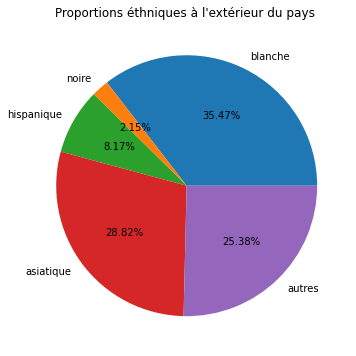

In [41]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(other_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportions éthniques à l\'extérieur du pays ')
plt.savefig("O_etnique.png")

plt.show()

In [42]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_other = list(other.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(other.UNDER18p/100)
pop_m18 = list()
for i in range(8):
    pop_m18.append(round(pop_other[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(other.F18TO24p/100)
pop_d18a25 = list()
for i in range(8):
    pop_d18a25.append(round(pop_other[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(other.F25TO44p/100)
pop_d25a44 = list()
for i in range(8):
    pop_d25a44.append(round(pop_other[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(other.F45TO64p/100)
pop_de45a64 = list()
for i in range(8):
    pop_de45a64.append(round(pop_other[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(other.MORE65p/100)
pop_p65 = list()
for i in range(8):
    pop_p65.append(round(pop_other[i]*prop_p65[i]))

    
    
other_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
other_age

[440833, 187601, 510855, 510439, 233744]

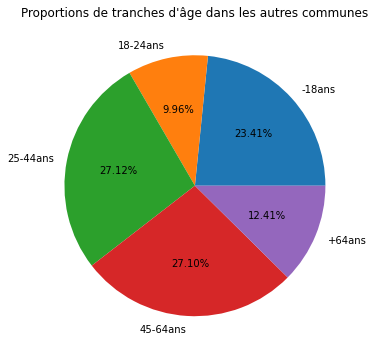

In [43]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(other_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportions de tranches d\'âge dans les autres communes')
plt.savefig("OTHER_age.png")

plt.show()

In [44]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_other = list(other.POP10)

#population non diplômé
prop_nodiplome = list(other.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(8):
    pop_nodiplome.append(round(pop_other[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(other.F9TO12THp/100)
pop_lycee = list()
for i in range(8):
    pop_lycee.append(round(pop_other[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(other.UNDERGRADp/100)
pop_bac = list()
for i in range(8):
    pop_bac.append(round(pop_other[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(other.GRADUATEp/100)
pop_univ = list()
for i in range(8):
    pop_univ.append(round(pop_other[i]*prop_univ[i]))

    
other_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
other_scolaire

[74835, 613621, 635189, 559925]

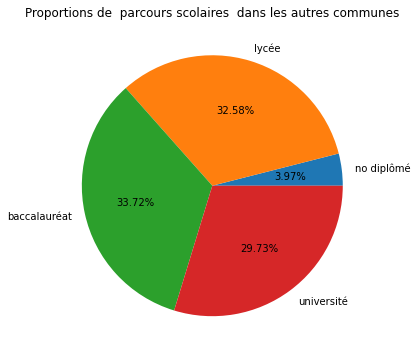

In [45]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(other_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportions de  parcours scolaires  dans les autres communes')
plt.savefig("OTHER_scolaire.png")

plt.show()

In [46]:
#On calcule les proportions des revenus

#on va créer un fonction pour faire des proportions
pop_other = list(other.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(other.F0TO20p/100)
pop_m20d = list()
for i in range(8):
    pop_m20d.append(round(pop_other[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(other.F20TO40p/100)
pop_m2040d = list()
for i in range(8):
    pop_m2040d.append(round(pop_other[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(other.F40TO60p/100)
pop_m4060d = list()
for i in range(8):
    pop_m4060d.append(round(pop_other[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(other.F60TO80p/100)
pop_m6080d = list()
for i in range(8):
    pop_m6080d.append(round(pop_other[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(other.F80TO100p/100)
pop_p80d = list()
for i in range(8):
    pop_p80d.append(round(pop_other[i]*prop_p80d[i])) 
    
    
other_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
other_revenu

[224466, 289356, 296210, 484917, 588516]

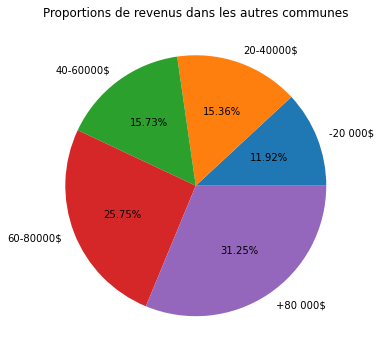

In [47]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(other_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportions de revenus dans les autres communes')
plt.savefig("OTHER_revenu.png")

plt.show()

# Résumé et comparaison

### Population moyenne par commune

In [48]:

np.shape(n_w)

(103, 29)

In [49]:
np.shape(n_w)[0]

103

In [50]:
np.shape(n_e)

(372, 29)

In [51]:
np.shape(s_e)

(224, 29)

In [52]:
np.shape(s_w)

(210, 29)

In [53]:
np.shape(other)

(8, 29)

In [54]:
#Calcul de population moyen

pop_moyen = [sum(n_e.POP10)/np.shape(n_e)[0],
             sum(n_w.POP10)/np.shape(n_w)[0],
             sum(s_w.POP10)/np.shape(s_w)[0],
             sum(s_e.POP10)/np.shape(s_e)[0],
             sum(other.POP10)/np.shape(other)[0]]
pop_moyen

[348168.8387096774,
 147982.61165048543,
 393271.97142857144,
 263814.28571428574,
 235431.875]


### Âge moyen 

In [55]:
age_classe = [9,21,34,54,75]

In [56]:
#Nombre de personnes par âge pour chaque région

#nord-est
age_n_e = [3748798/sum(n_e.POP10),
           1532473/sum(n_e.POP10),
           4084287/sum(n_e.POP10),
           3988200/sum(n_e.POP10),
           1888064/sum(n_e.POP10)]

#sud-est
age_s_e = [13879767/sum(s_e.POP10),
           5841575/sum(s_e.POP10),
           15593114/sum(s_e.POP10),
           15570525/sum(s_e.POP10),
           8209191/sum(s_e.POP10)]



#nord-est
age_n_w = [3748798/sum(n_w.POP10),
           1532473/sum(n_w.POP10),
           4084287/sum(n_w.POP10),
           3988200/sum(n_w.POP10),
           1888064/sum(n_w.POP10)]

#sud-ouest
age_s_w = [21249301/sum(s_w.POP10),
           8563841/sum(s_w.POP10),
           23086624/sum(s_w.POP10),
           21464945/sum(s_w.POP10),
           11907025/sum(s_w.POP10)]

#autres états
age_other = [440833/sum(other.POP10),
             187601/sum(other.POP10),
             510855/sum(other.POP10),
             510439/sum(other.POP10),
             233744/sum(other.POP10)]



In [57]:
#Calcul d'âge moyen 

age_moyen = []

#age moyen nord-est
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_n_e[i])
    
age_moyen.append(round(s_c,1))  


#age moyen nord-ouest
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_n_w[i])
    
age_moyen.append(round(s_c,1))


#age moyen sud-ouest
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_s_w[i])
    
age_moyen.append(round(s_c,1))


#age moyen sud-est
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_s_e[i])
    
age_moyen.append(round(s_c,1))


#age moyen autres états
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_other[i])
    
age_moyen.append(round(s_c,1))

In [58]:
age_moyen

[4.3, 36.9, 38.8, 37.8, 37.4]

In [59]:
age_moyen2 = []

#age moyen nord-est
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_n_e[i])*10
    print(s_c)
    
age_moyen2.append(round(s_c,1))  

2.6049639060915384
5.089694386316465
15.81136177534926
32.43927885747682
43.372424567094534


### Revenu moyen 

In [60]:
revenu_classe = [10000,30000,50000,70000,90000]

In [62]:
#Nombre de personnes par revenu annuel pour chaque région

#nord-est
rev_ne = [21794928/sum(n_e.POP10),
          24670851/sum(n_e.POP10),
          21329675/sum(n_e.POP10),
          29556135/sum(n_e.POP10),
          32164492/sum(n_e.POP10)]


#sud-est
rev_se = [12115244/sum(s_e.POP10),
           13420190/sum(s_e.POP10),
           10513842/sum(s_e.POP10),
           13302689/sum(s_e.POP10),
           9491768/sum(s_e.POP10)]


#nord-est
rev_nw = [2458211/sum(n_w.POP10),
           3087334/sum(n_w.POP10),
           2710207/sum(n_w.POP10),
           3718377/sum(n_w.POP10),
           3268416/sum(n_w.POP10)]



#sud-ouest
rev_sw = [13827915/sum(s_w.POP10),
           16417329/sum(s_w.POP10),
           13755796/sum(s_w.POP10),
           18348939/sum(s_w.POP10),
           20238863/sum(s_w.POP10)]



#autres états
rev_other = [224466/sum(other.POP10),
             289356/sum(other.POP10),
             296210/sum(other.POP10),
             484917/sum(other.POP10),
             588516/sum(other.POP10)]



In [63]:
#Calcul d'âge moyen 

revenu_moyen = []

#age moyen nord-est
s_c = 0
for i in range(5):
    s_c += revenu_classe[i]*(rev_ne[i])
    
revenu_moyen.append(round(s_c,1))  


#age moyen nord-ouest
s_c = 0
for i in range(5):
    s_c += revenu_classe[i]*(rev_nw[i])
    
revenu_moyen.append(round(s_c,1))  


#age moyen sud-ouest
s_c = 0
for i in range(5):
    s_c += revenu_classe[i]*(rev_sw[i])
    
revenu_moyen.append(round(s_c,1))  


#age moyen sud-est
s_c = 0
for i in range(5):
    s_c += revenu_classe[i]*(rev_se[i])
    
revenu_moyen.append(round(s_c,1))  


#age moyen autres états
s_c = 0
for i in range(5):
    s_c += revenu_classe[i]*(rev_other[i])
    
revenu_moyen.append(round(s_c,1))  


In [64]:
revenu_moyen

[53955.8, 52955.3, 53573.9, 47972.4, 59808.4]